In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Loading Image

In [2]:
img = cv2.imread('watch.jpg',cv2.IMREAD_GRAYSCALE) # The second parameter shows the Degree of Opaqueness(Opposite of Transpracy)=Alpha
cv2.waitKey(0) # We wait for any key to be pressed.
cv2.destroyAllWindows() #to close everything

Rather than using IMREAD_COLOR...etc, you can also use simple numbers. You should be familiar with both options, so you understand what the person is doing. For the second parameter, you can use -1, 0, or 1. Color is 1, grayscale is 0, and the unchanged is -1. Thus, for grayscale, one could do img = cv2.imread('watch.jpg', 0)

We can use Matplot to plot the IMG

([], <a list of 0 Text major ticklabel objects>)

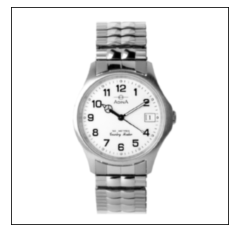

In [3]:
plt.imshow(img,cmap = 'gray',interpolation='bicubic')
# # to hide tick values on X and Y axis
plt.xticks([])
plt.yticks([])

#plt.plot([200,300,400],[100,200,300],'c', linewidth=5)
#plt.show()

Note that you can plot lines, just as you would or could with any other Matplotlib graph using the pixel locations as coordinates, here. Should you wish to draw on your images, however, Matplotlib is not required. OpenCV provides great methods for this. When you are done making modifications, you can save, like so:

In [4]:
cv2.imwrite('watch.png',img) # To save the image

True

# Loading Video

'cv2.VideoCapture(0)' will return video from the first webcam on your computer.

In most cases, only one camera is connected to the system. So, all we do is pass ‘0’ and OpenCV uses the only camera attached to the computer. When more than one camera is connected to the computer, we can select the second camera by passing ‘1’, the third camera by passing ‘2’ and so on.

This code initiates an infinite loop (to be broken later by a break statement), where we have ret and frame being defined as the cap.read(). Basically, ret is a boolean regarding whether or not there was a return at all, at the frame is each frame that is returned. If there is no frame, you wont get an error, you will get None.

After reading a video file, we can display the video frame by frame. A frame of a video is simply an image and we display each frame the same way we display images, i.e., we use the function imshow().

Here, we define a new variable, gray, as the frame, converted to gray. Notice this says BGR2GRAY. It is important to note that OpenCV reads colors as BGR (Blue Green Red), where most computer applications read as RGB (Red Green Blue).

As in the case of an image, we use the waitKey() after imshow() function to pause each frame in the video. In the case of an image, we pass ‘0’ to the waitKey() function, but for playing a video, we need to pass a number greater than ‘0’ to the waitKey() function. This is because ‘0’ would pause the frame in the video for an infinite amount of time and in a video we need each frame to be shown only for some finite interval of time, so we need to pass a number greater than ‘0’ to the waitKey() function. This number is equal to the time in milliseconds we want each frame to be displayed.

This statement just runs once per frame. Basically, if we get a key, and that key is a q, we will exit the while loop with a break, which then runs

In [5]:
capture=cv2.VideoCapture(0)

while (True):
    flag,frame=capture.read()
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()        
cv2.destroyAllWindows()

# Drwaing and Writing on Image

In [6]:
img=cv2.imread('watch.png',cv2.IMREAD_COLOR)

cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)

cv2.line(img,(0,0),(120,120),(255,0,255),15)

cv2.circle(img,(100,63), 55, (0,255,0), 20)

cv2.circle(img,(100,90), 55, (0,0,0), -1) ##Black filled in circle

cv2.putText(img,'Green',(10,500),cv2.FONT_HERSHEY_SIMPLEX,6,(200,255,155),13,cv2.LINE_AA,True) 
cv2.putText(img,'Yellow',(10,500),cv2.FONT_HERSHEY_SIMPLEX,6,(200,255,255),13,cv2.LINE_AA,False)

cv2.imshow('image',img)

cv2.waitKey(0) # We wait for any key to be pressed.
cv2.destroyAllWindows() #to close everything

# Image Operations 

 Every video breaks down into frames. Each frame, like an image, then breaks down into pixels stored in rows and columns within the frame/picture. Each pixel has a coordinate location, and each pixel is comprised of color values.

In [7]:
img = cv2.imread('watch_1.jpg',cv2.IMREAD_COLOR)

In [8]:
px = img[55,55]

In [9]:
print(px) #Color Values

[42 42 42]


In [10]:
img[55,55]=[255,42,255] # Change the color value 

In [11]:
px = img[55,55]
print(px)

[255  42 255]


Region of Image

In [12]:
px=img[100:150,100:150]

In [13]:
img[100:150,100:150] = [255,255,255]

In [14]:
print(img.shape)
print(img.size)
print(img.dtype)

(560, 420, 3)
705600
uint8


In [15]:
watch_face = img[37:111,107:194]

img= watch_face

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Arithmetic and Logic Operation

In [16]:
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')

add=img1+img2
cv2.imshow('image',add)


cv2.waitKey(0) # We wait for any key to be pressed.
cv2.destroyAllWindows() #to close everything

Cv2 had An add method of its own

In [17]:
add=cv2.add(img1,img2)
cv2.imshow('image',add)


cv2.waitKey(0) # We wait for any key to be pressed.
cv2.destroyAllWindows() #to close everything

Probably not the ideal here either. We can see that much of the image is very "white." This is because colors are 0-255, where 255 is "full light." Thus, for example: (155,211,79) + (50, 170, 200) = 205, 381, 279...translated to (205, 255,255).

Next, we can add images, and have each carry a different "weight" so to speak

In [18]:
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')

weight=cv2.addWeighted(img1,0.6,img2,0.4,0)

cv2.imshow('weighted',weight)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding

() The idea of thresholding is to further-simplify visual data for analysis.

()What thresholding can do, at the most basic level, is convert everything to white or black, based on a threshold value. Let's say we want the threshold to be 125 (out of 255), then everything that was 125 and under would be converted to 0, or black, and everything above 125 would be converted to 255, or white. If you convert to grayscale as you normally will, you will get white and black. If you do not convert to grayscale, you will get thresholded pictures, but there will be color.

()The first parameter here is the image.

()The next parameter is the threshold, we are choosing 10. 

()The next is the maximum value, which we're choosing as 255.

() Finally we have the type of threshold, which we've chosen as THRESH_BINARY.

In [19]:
img = cv2.imread('bookpage.jpg')
cv2.imshow('image',img)

reval,threshold=cv2.threshold(img,10,255,cv2.THRESH_BINARY)
cv2.imshow('image',threshold)

cv2.waitKey(0)
cv2.destroyAllWindows()

The image now is slightly better for reading, but still a bit of a mess. Visually, it is better, but using a program to analyze this will still be quite hard. 

First, let's grayscale the image, and then do a threshold:

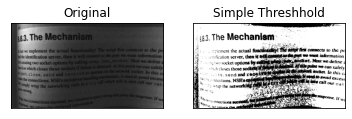

In [20]:
img = cv2.imread('bookpage.jpg',cv2.IMREAD_GRAYSCALE)
#cv2.imshow('image',img)

reval,threshold=cv2.threshold(img,10,255,cv2.THRESH_BINARY)
cv2.imshow('image',threshold)


images = [img, threshold]
titles=['Original','Simple Threshhold']

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

Adaptive Threshold

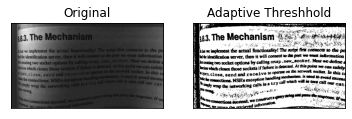

In [21]:
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)


images = [img, th]
titles=['Original','Adaptive Threshhold']

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

# Image Gradient & Edge Detection 

In [4]:
capture=cv2.VideoCapture(0)

while (True):
    _,frame=capture.read()
    hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    mask=cv2.inRange(hsv,lower_red,upper_red)
    result=cv2.bitwise_and(frame,frame, mask= mask)
    
    sobel_x=cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5) # Horizontal direction x=1,y=0
    sobel_y=cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5) # Vertical direction   x=0,y=1
    lap = cv2.Laplacian(frame,cv2.CV_64F)  # Output Image type
    canny=cv2.Canny(frame,100,300)
    
    cv2.imshow('Original',frame)
    cv2.imshow('Sobel_Y',sobel_y)
    cv2.imshow('Sobel_X',sobel_x)
    cv2.imshow('Laplacian',lap)
    cv2.imshow('Canny',canny)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()        
cv2.destroyAllWindows()

# Refrences

() https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html

() https://docs.opencv.org/3.4/d7/da8/tutorial_table_of_content_imgproc.html

# Template Matching

In [3]:
img_gray = cv2.imread('opencv-template-matching-python-tutorial.jpg',0)
img_rbg = cv2.imread('opencv-template-matching-python-tutorial.jpg',1)

template = cv2.imread('opencv-template-for-matching.jpg',0)

width,height=template.shape[::-1]

#cv2.imshow('image',img)


In [4]:
height

22

In [5]:
res=cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 

#plt.subplot(121)
#plt.imshow(img_gray,cmap = 'gray')

#plt.subplot(122)
#plt.imshow(res,cmap = 'gray')

threshold=0.8
loc=np.where(res>=threshold)


for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rbg, pt, (pt[0] + width, pt[1] + height), (0,255,255), 2)

cv2.imshow('Detected',img_rbg)

#  Corner Detection

So far, we load the image, convert to gray, then to float32. Next, we detect corners with the goodFeaturesToTrack function. The parameters here are the image, max corners to detect, quality, and minimum distance between corners. As mentioned before, the aliasing issues we have here will allow for many corners to be found, so we put a limit on it.

In [2]:
img = cv2.imread('opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for c in corners:
    x,y=c.ravel() # Flattens out the array
    cv2.circle(img,(x,y),3,255,-1)
    
cv2.imshow('Corner',img)    

# Feature Matching

We start with the image that we're hoping to find, and then we can search for this image within another image. The beauty here is that the image does not need to be the same lighting, angle, rotation...etc. The features just need to match up.

Load both the images

In [2]:
img1 = cv2.imread('opencv-feature-matching-template.jpg',0)
img2 = cv2.imread('opencv-feature-matching-image.jpg',0)

Create the ORB object

In [3]:
orb=cv2.ORB_create()

Create the keypoints and the descriptors for both images

() https://stackoverflow.com/questions/29133085/what-are-keypoints-in-image-processing

In [4]:
key1,des1=orb.detectAndCompute(img1,None)
key2,des2=orb.detectAndCompute(img2,None)

Create Brute Force Matching Object

() https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

Returns matches between both the descriptors

In [6]:
matches=bf.match(des1,des2)

Sort the matches according to the distance.

In [8]:
matches=sorted(matches,key=lambda x:x.distance)

Help us draw the best matches

In [12]:
img3=cv2.drawMatches(img1,key1,img2,key2,matches[:10],None,flags=2)

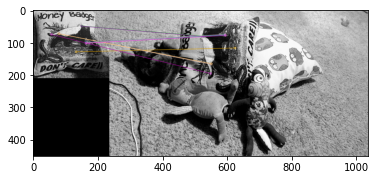

In [13]:
plt.imshow(img3)
plt.show()

# Background Detection

It is used to reduce the background of images, by detecting motion.

The idea here is to extract the moving forground from the static background.

() https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html

In [2]:
cap = cv2.VideoCapture('people-walking.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(True):
    _,frame=cap.read()
    fgframe=fgbg.apply(frame)
    
    cv2.imshow('fgbg',fgframe)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()        
cv2.destroyAllWindows()

# Refrences

https://pythonprogramming.net/loading-images-python-opencv-tutorial/